# Signal Generator

## Valid Signal Generator Clocks

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
SysClk = 80e6
SamplesPerPeriod = 16000

In [4]:
def SSIClkGenerator():
    for multiplier in range(1, 16+1):
        for predivider in range(2, 254+1, 2):
            for divider in range(1, 256+1, 1):
                SSIFrequency = SysClk / (predivider*divider)
                Frequency = SSIFrequency * multiplier / SamplesPerPeriod
                if Frequency >= 20 and SSIFrequency <= 20e6:
                    yield multiplier, predivider, divider, SSIFrequency, Frequency

In [5]:
data = pd.DataFrame(SSIClkGenerator(), columns=("multiplier", "predivider", "divider", "SSIFrequency", "Frequency"))

In [6]:
data = data.sort_values(by=["Frequency", "multiplier", "predivider", "divider"])

In [7]:
def UniqueGenerator(clk, name):
    last = None
    for index, line in clk.iterrows():
        if last != line[name]:
            last = line[name]
            yield line

In [8]:
data = pd.DataFrame(UniqueGenerator(data, "Frequency"))

In [9]:
n = 33
data["m"] = np.round(n * np.log10(data["Frequency"]/20))

In [10]:
data["error"] = (20 * (10**data["m"])**(1/n) - data["Frequency"]) / data["Frequency"]

In [11]:
data["fom"] = (data["multiplier"]-1) * 0.001 + np.abs(data["error"])

In [12]:
data = data.sort_values(by=["m", "fom"])

In [13]:
data = pd.DataFrame(UniqueGenerator(data, "m"))

In [14]:
data

,multiplier,predivider,divider,SSIFrequency,Frequency,m,error,fom
123,1.0,2.0,125.0,3.200000e+05,20.000000,0.0,0.000000e+00,0.000000
853,2.0,2.0,233.0,1.716738e+05,21.459227,1.0,-6.469491e-04,0.001647
2336,3.0,4.0,163.0,1.226994e+05,23.006135,2.0,-4.779187e-04,0.002478
823,2.0,2.0,203.0,1.970443e+05,24.630542,3.0,1.071552e-03,0.002072
809,2.0,2.0,189.0,2.116402e+05,26.455026,4.0,-6.124918e-04,0.001612
86,1.0,2.0,88.0,4.545455e+05,28.409091,5.0,-2.098189e-03,0.002098
80,1.0,2.0,82.0,4.878049e+05,30.487805,6.0,-2.938330e-03,0.002938
2147,3.0,2.0,230.0,1.739130e+05,32.608696,7.0,-4.194881e-04,0.002419
763,2.0,2.0,143.0,2.797203e+05,34.965035,8.0,-4.137552e-04,0.001414
2117,3.0,2.0,200.0,2.000000e+05,37.500000,9.0,-6.307078e-04,0.002631


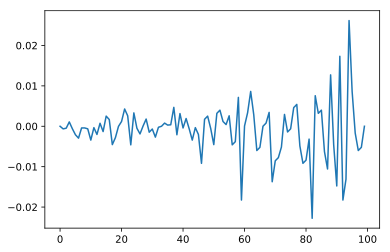

In [15]:
plt.plot(data["error"].values)

In [16]:
for index, row in data.iterrows():
    print("\t{{{}, {}, {}}}, // {}".format(int(row["multiplier"]), int(row["predivider"]), int(row["divider"]), round(row["Frequency"], 2)))

	{1, 2, 125}, // 20.0
	{2, 2, 233}, // 21.46
	{3, 4, 163}, // 23.01
	{2, 2, 203}, // 24.63
	{2, 2, 189}, // 26.46
	{1, 2, 88}, // 28.41
	{1, 2, 82}, // 30.49
	{3, 2, 230}, // 32.61
	{2, 2, 143}, // 34.97
	{3, 2, 200}, // 37.5
	{1, 2, 62}, // 40.32
	{1, 2, 58}, // 43.1
	{1, 2, 54}, // 46.3
	{2, 2, 101}, // 49.5
	{1, 2, 47}, // 53.19
	{1, 2, 44}, // 56.82
	{1, 2, 41}, // 60.98
	{1, 2, 38}, // 65.79
	{2, 2, 71}, // 70.42
	{5, 2, 166}, // 75.3
	{1, 2, 31}, // 80.65
	{1, 2, 29}, // 86.21
	{1, 2, 27}, // 92.59
	{1, 2, 25}, // 100.0
	{2, 2, 47}, // 106.38
	{6, 2, 131}, // 114.5
	{3, 2, 61}, // 122.95
	{1, 2, 19}, // 131.58
	{4, 2, 71}, // 140.85
	{2, 2, 33}, // 151.52
	{5, 2, 77}, // 162.34
	{3, 2, 43}, // 174.42
	{5, 2, 67}, // 186.57
	{2, 2, 25}, // 200.0
	{3, 2, 35}, // 214.29
	{8, 2, 87}, // 229.89
	{7, 2, 71}, // 246.48
	{2, 2, 19}, // 263.16
	{5, 2, 44}, // 284.09
	{4, 2, 33}, // 303.03
	{3, 2, 23}, // 326.09
	{6, 2, 43}, // 348.84
	{3, 2, 20}, // 375.0
	{5, 2, 31}, // 403.23
	{5, 2, 29